In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("NonHermitianQW"))))

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from SSH import *


<h1>SSH with periodic boundary conditions</h1>

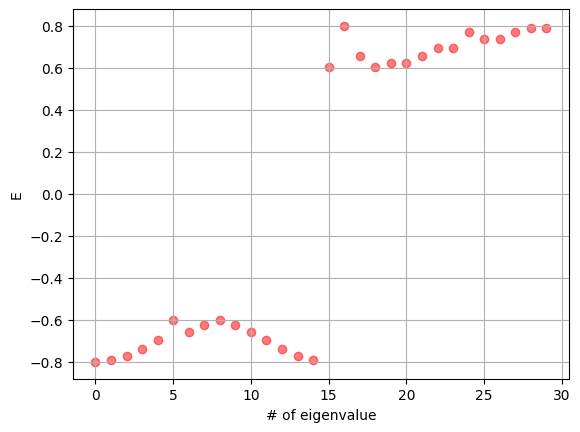

In [3]:
ssh = BulkSSH(15,{
    "u" : 0.7,
    "v" : 0.1
})

E = ssh.get_eigen()
plt.scatter(range(len(E)),E,color = "red",alpha = 0.5)
plt.xlabel("# of eigenvalue")
plt.ylabel("E")
plt.grid(True)
plt.show()

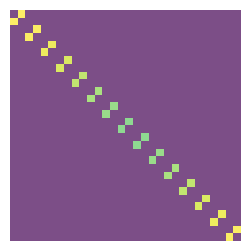

In [4]:
Hk = ssh.get_momentum()

fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot()
ax.imshow(np.abs(Hk),alpha = 0.7)
ax.axis('off')
plt.show()

In [5]:
def plot_Energy(ax,x_,E,u,v):
    ax.grid(True)
    ax.scatter(x_,E[0],alpha = 0.5,color = "blue")
    ax.scatter(x_,E[1],alpha = 0.5,color = "red")
    ax.set_xlabel("k")
    ax.set_ylabel(r"$E_{k}$")
    ax.set_title(f"u: {u}, v:{v}")

c:\Users\stemp\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\stemp\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


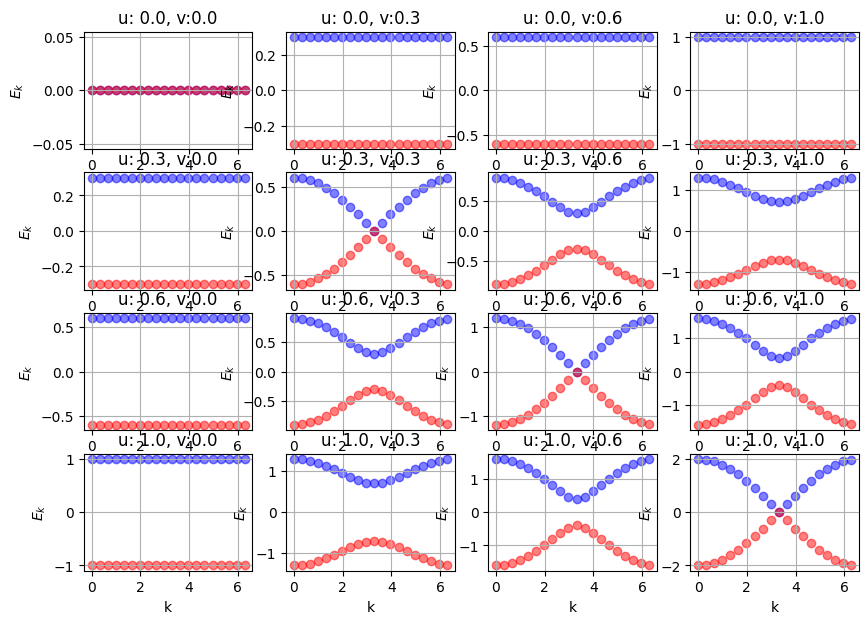

In [6]:
u_tab = [0. , 0.3, 0.6, 1.]
lenu = len(u_tab)
v_tab = [0. , 0.3, 0.6, 1.]
lenv = len(v_tab)

fig = plt.figure(figsize = (10,7))

for i in range(lenu):
    for j in range(lenv):
        ax = fig.add_subplot(lenu,lenv,(i*lenu) + j+1)
        ssh = BulkSSH(20,{"u" : u_tab[i],"v" : v_tab[j]})
        E = ssh.get_eigen_momentum()
        x_ = np.linspace(0,2*np.pi,E.shape[1])
        plot_Energy(ax,x_,E,u_tab[i],v_tab[j])

plt.show()

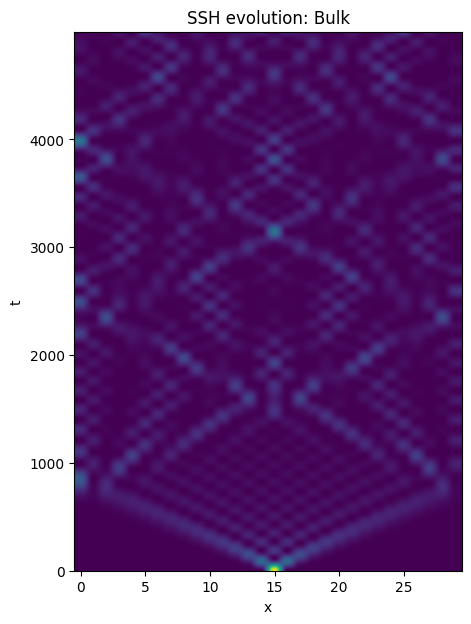

In [7]:
dim = 15
ssh = BulkSSH(dim,{"u" : 0.1,"v" : 0.1})
psi = np.zeros(2*dim)
psi[dim] = 1.
T = 500
data = ssh.Evolution(psi,T,dt = 0.1)
fig = plt.figure(figsize = (5,7))
ax = fig.add_subplot()
ax.imshow(data,aspect = 'auto',origin="lower")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_title("SSH evolution: Bulk")
plt.show()


In [8]:
u,v,sd = ssh.spectrum_dependencies()

c:\Users\stemp\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


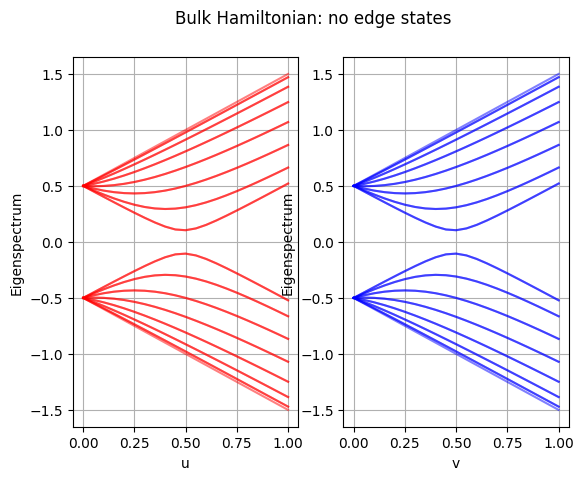

In [9]:
%matplotlib inline


fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.suptitle("Bulk Hamiltonian: no edge states")


for k in range(sd.shape[0]):
    ax.plot(u,sd[k,:,10],color = "red",alpha = 0.5)
    ax2.plot(u,sd[k,10,:],color = "blue",alpha = 0.5)
ax.set_xlabel("u")
ax.set_ylabel("Eigenspectrum")
ax.grid(True)

ax2.set_xlabel("v")
ax2.set_ylabel("Eigenspectrum")
ax2.grid(True)
plt.show()

<h1>SSH with broken translational symmetry</h1>

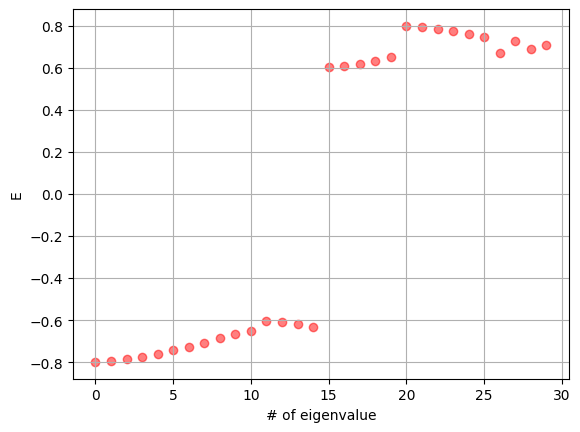

In [10]:
ssh = BoundSSH(15,{
    "u" : 0.7,
    "v" : 0.1
})

E = ssh.get_eigen()
plt.scatter(range(len(E)),E,color = "red",alpha = 0.5)
plt.xlabel("# of eigenvalue")
plt.ylabel("E")
plt.grid(True)
plt.show()

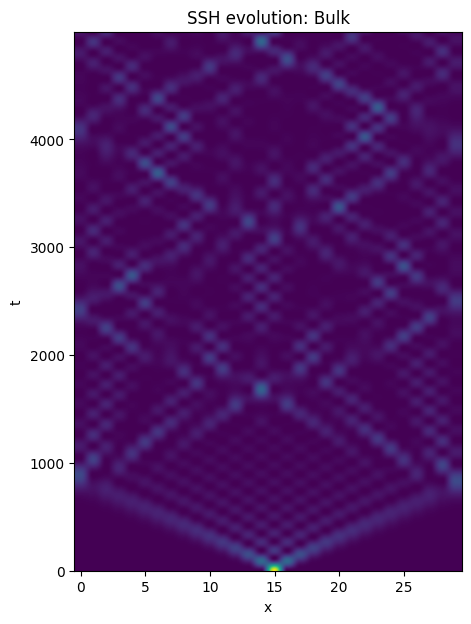

In [11]:
dim = 15
ssh = BoundSSH(dim,{"u" : 0.1,"v" : 0.1})
psi = np.zeros(2*dim)
psi[dim] = 1.
T = 500
data = ssh.Evolution(psi,T,dt = 0.1)
fig = plt.figure(figsize = (5,7))
ax = fig.add_subplot()
ax.imshow(data,aspect = 'auto',origin="lower")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_title("SSH evolution: Bulk")
plt.show()

In [12]:
u,v,sd = ssh.spectrum_dependencies()

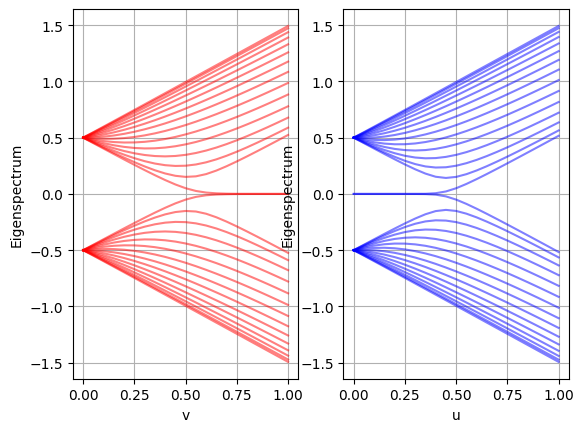

In [13]:
%matplotlib inline


fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


for k in range(sd.shape[0]):
    ax.plot(u,sd[k,:,10],color = "red",alpha = 0.5)
    ax2.plot(u,sd[k,10,:],color = "blue",alpha = 0.5)
ax.set_xlabel("v")
ax.set_ylabel("Eigenspectrum")
ax.grid(True)

ax2.set_xlabel("u")
ax2.set_ylabel("Eigenspectrum")
ax2.grid(True)
plt.show()

<h1>Edge states</h1>

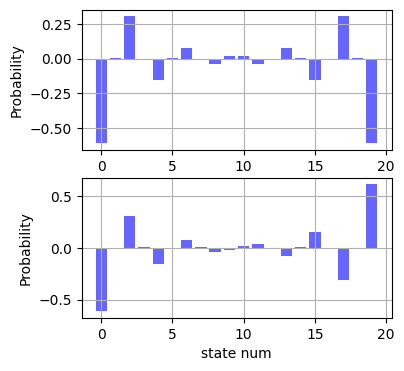

In [15]:
dim = 10
ssh = BoundSSH(dim,{"u" : 0.5, "v" : 1})
E,U = np.linalg.eig(ssh.H_)
inds = np.arange(0,2*dim)[np.abs(np.round(E,2)) == 0]

fig = plt.figure(figsize = (4,4))
for i in range(len(inds)):
    ax = fig.add_subplot(len(inds),1,i+1)
    ax.bar(range(U.shape[0]),U[:,inds[i]],alpha = 0.6,color = "blue")
    ax.set_xlabel("state num")
    ax.set_ylabel("Probability")
    ax.grid(True)